## Content:
- [Part 1](#part1)- Importing the libraries, packages
- [Part 2](#part2)- Feature Engineering
- [Part 3](#part3) - Label Encoded Data
- [Part 4](#part4) -  Hot encoded Data
- [Part 5](#part5) -  Scaling Data
- [Part 6](#part6) -  Lasso regression
- [Part 7](#part7) -  ANN 1 hidden layer label encoded data
- [Part 8](#part8) -  ANN L1 regularizer
- [Part 9](#part9) -  ANN L2 hidden layers 
- [Part 10](#part10) -  ANN 2 hidden layers


[Back to top](#Content:)



<a id='part1'></a>

### Part 1 -   Importing the libraries, packages

In [2]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder




random.seed(0)

In [3]:
## loading the file
health_care = pd.read_csv('../healthcare/train_data.csv', na_values=['NA', 'NaN', '?'])

In [4]:
health_care.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
# Dropping na values for 
#health_care = health_care.dropna()
health_care.drop(['City_Code_Patient'], axis=1, inplace=True)

In [5]:
#let's fill missing values of 'Bed Grade' with its median of the column

med = health_care['Bed Grade'].median()
health_care['Bed Grade'] = health_care['Bed Grade'].fillna(med)

# Objectif :

Predict length of stay of the patient. We use regression and classification.

### Regression

Prediction directly the length of stay.

### Classifiation 

Predicting the class of length of stay e.g 30-40 days

[Back to top](#Content:)


<a id='part2'></a>

## Feature engineering

We will add 2 features : 
- Visit number
- New Patient

In [6]:
n = health_care.shape[0]
visits = []
patientid = np.array(health_care['patientid'])
for i in range(n) :
    count = (patientid[:i+1] == patientid[i]).sum()
    visits.append(count)
    
health_care['Visit Number'] = visits
health_care['New Patient'] = (health_care['Visit Number']==1).astype('int32')

In [7]:
health_care.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Visit Number,New Patient
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,Emergency,Extreme,2,51-60,4911.0,0-10,1,1
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,Trauma,Extreme,2,51-60,5954.0,41-50,2,0
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,Trauma,Extreme,2,51-60,4745.0,31-40,3,0
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,Trauma,Extreme,2,51-60,7272.0,41-50,4,0
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,Trauma,Extreme,2,51-60,5558.0,41-50,5,0


[Back to top](#Content:)


<a id='part3'></a>
## Label Encoded Data

In [5]:
## Columns to be label encoded

string_columns = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code',  'Type of Admission', 'Severity of Illness', 'Age' ]
encoder = LabelEncoder()


## label_encoded data
X_le = health_care.drop(['Stay', 'case_id'], axis=1)
y_le = health_care['Stay']

# Transofrming length of stay
y_le = encoder.fit_transform(y_le)
y_le = 10*y_le + 5

for column in string_columns :
    X_le[column] = encoder.fit(X_le[column]).transform(X_le[column])
    

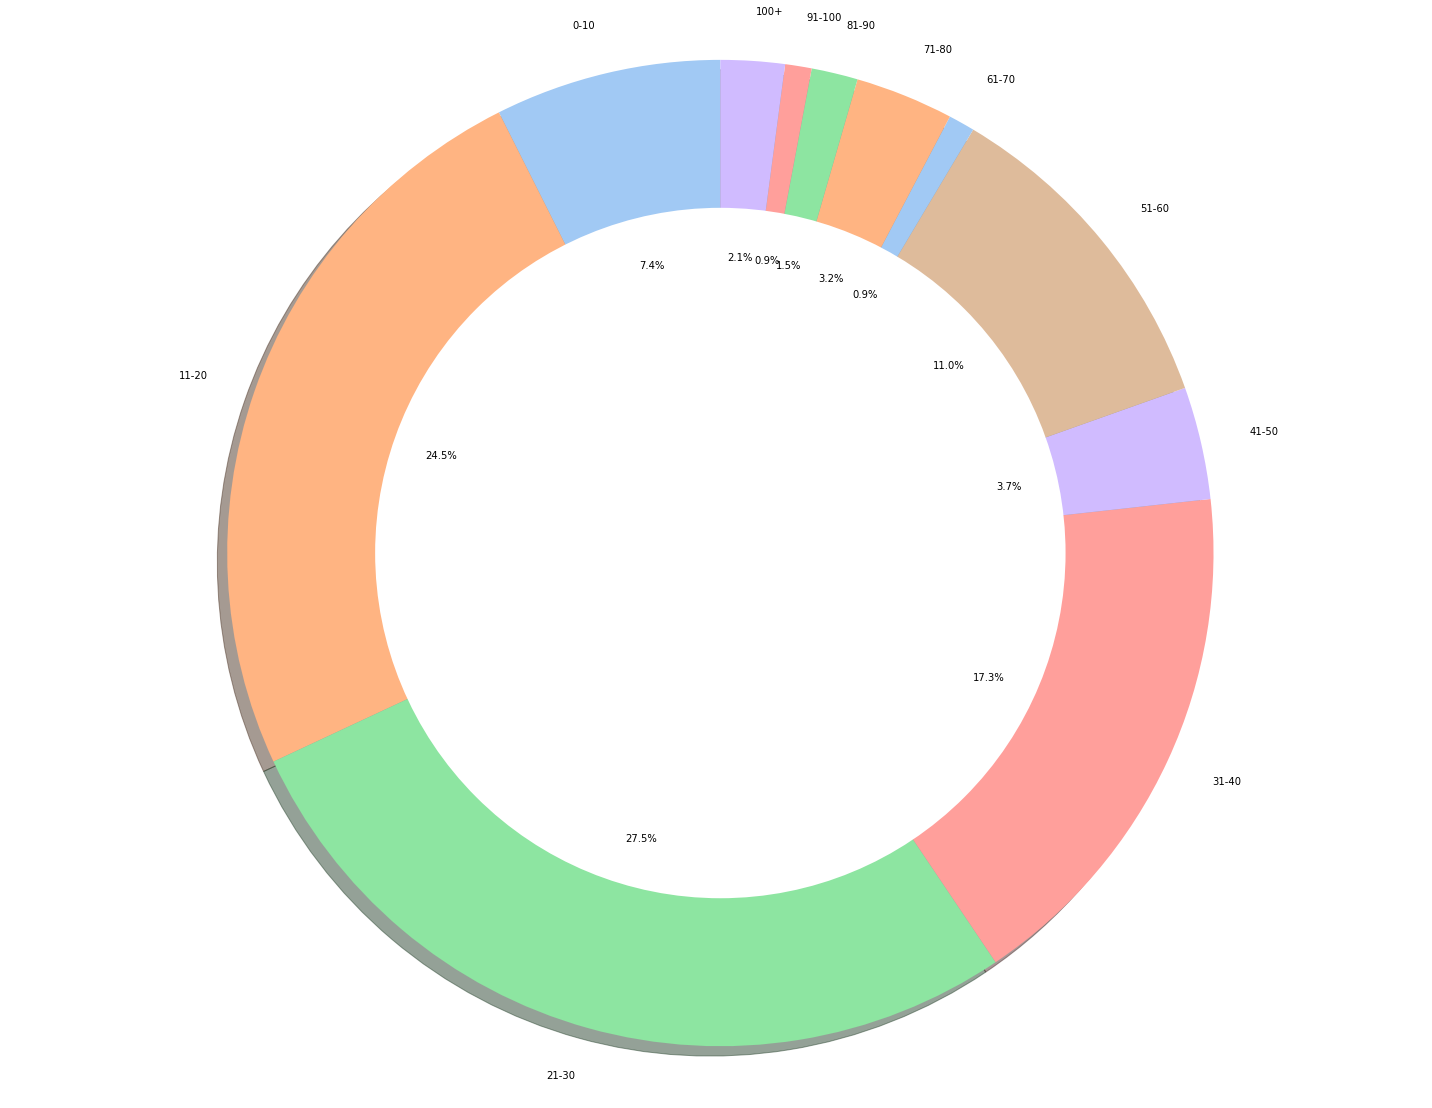

In [29]:
fig, ax1 = plt.subplots()
labels = np.unique(health_care['Stay'])
labels[-1] = '100+'

#colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff','#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0']
#colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:6]
plt.pie(health_care.groupby('Stay').size(), labels = labels,colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(20, 15.5)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [24]:
labels

array(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70',
       '71-80', '81-90', '91-100', 'More than 100 Days'], dtype=object)

### Adding target for classification 

In [9]:
import keras.utils
y_cat = encoder.fit_transform(health_care['Stay'])
y_cat_targ = keras.utils.to_categorical(encoder.fit_transform(health_care['Stay']))


Using TensorFlow backend.


[Back to top](#Content:)


<a id='part4'></a>
## Hot encoded Data

In [10]:
# Function to hot encode the column with name : name for dataframe df
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True) ## inplace to make changed on the original df

In [11]:
## Pre processing these columns

le_string_columns = [  'Severity of Illness', 'Age' ]
dummies_string_columns = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code',  'Type of Admission']
encoder = LabelEncoder()
#ohEncoder = OneHotEncoder()

## label_encoded data
Xe = health_care.drop(['Stay', 'case_id'], axis=1)
Xe['Severity of Illness']= Xe['Severity of Illness'].map({'Minor': 0,  'Moderate': 1,'Extreme': 2})
Xe['Age'] = encoder.fit_transform(Xe['Age'])

ye = health_care['Stay']
ye = encoder.fit_transform(ye)
ye = 10*ye + 5
ye

for column in dummies_string_columns :
    encode_text_dummy(Xe, column)
    

[Back to top](#Content:)


<a id='part5'></a>
## Scaling Label Encoded Data

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = X_le.values
y = y_le
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
for i in range(X_train.shape[1]) :
    X_train[:,i]= scaler.fit_transform(X_train[:,i].reshape(-1, 1))[:,0]
    X_test[:,i] = scaler.transform(X_test[:,i].reshape(-1, 1))[:,0]

[Back to top](#Content:)


<a id='part6'></a>
## Lasso for preliminar feature selection

In [41]:
# Function to plot Lasso coef
def report_coef(names,coef,intercept):
    r = pd.DataFrame( { 'coef': coef, 'positive': np.abs(coef)  }, index = names )
    r = r.sort_values(by=['positive'], ascending=True)
    display(r)
    print("Intercept: {}".format(intercept))
    plt.xlabel('covariate coefficient')
    r['coef'].plot(kind='barh')

In [42]:
import sklearn
from sklearn.linear_model import Lasso
from sklearn import metrics

# Create linear regression
regressor = Lasso(alpha=0.1)

# Fit/train LASSO
regressor.fit(X_train,y_train)
# Predict
X_pred = regressor.predict(X_test)

a= regressor.coef_
b = regressor.intercept_
c = np.sqrt(metrics.mean_squared_error(X_pred,y_test))

print('RMSE : %.2f' % c)
print('score : %.2f' % regressor.score(X_train,y_train))



RMSE : 17.01
score : 0.37


,coef,positive
patientid,-0.000000,0.000000
City_Code_Patient,-0.056820,0.056820
Admission_Deposit,0.087787,0.087787
Visit Number,-0.200844,0.200844
Hospital_region_code,0.246487,0.246487
Severity of Illness,-0.253918,0.253918
Hospital_type_code,0.439190,0.439190
Department,0.486087,0.486087
Ward_Facility_Code,0.507510,0.507510
Hospital_code,0.519537,0.519537


Intercept: 31.985858997892446


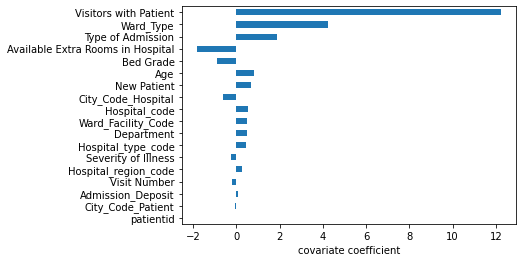

In [43]:
names = list(X_le.columns.values)
report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

[Back to top](#Content:)


<a id='part7'></a>
# ANN

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping


### First Model

In [45]:
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='loss', min_delta=1e-2, patience=5, verbose=1, mode='auto')
r = model.fit(X_train,y_train,verbose=1,epochs=100)
pred = model.predict(X_test)


Train on 235344 samples
Epoch 1/100
235344/235344 [==============================] - 6s 26us/sample - loss: 325.7933
Epoch 2/100
235344/235344 [==============================] - 6s 24us/sample - loss: 262.0113
Epoch 3/100
235344/235344 [==============================] - 6s 24us/sample - loss: 256.5576
Epoch 4/100
235344/235344 [==============================] - 6s 24us/sample - loss: 253.7319
Epoch 5/100
235344/235344 [==============================] - 6s 24us/sample - loss: 252.0407
Epoch 6/100
235344/235344 [==============================] - 6s 25us/sample - loss: 250.6949
Epoch 7/100
235344/235344 [==============================] - 6s 24us/sample - loss: 249.7415
Epoch 8/100
235344/235344 [==============================] - 6s 24us/sample - loss: 248.7331
Epoch 9/100
235344/235344 [==============================] - 6s 25us/sample - loss: 247.8135
Epoch 10/100
235344/235344 [==============================] - 6s 24us/sample - loss: 247.1515
Epoch 11/100
235344/235344 [=================

Train score (RMSE): 15.427693744302918
Test score (RMSE): 15.423764239997213


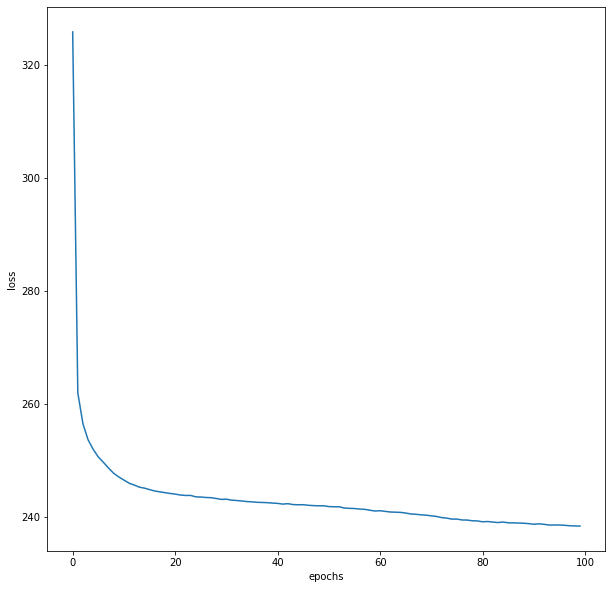

In [48]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
train_score = np.sqrt(metrics.mean_squared_error(train_pred,y_train))
test_score = np.sqrt(metrics.mean_squared_error(test_pred,y_test))

print("Train score (RMSE): {}".format(train_score))
print("Test score (RMSE): {}".format(test_score))

## plot the loss on the training data, and also the validation data
plt.figure(figsize=(10,10))

plt.plot(r.history['loss'])

plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()


In [49]:
def stay_cat(x):
    
    return np.floor((x-5)/10).astype(int)

In [51]:
y_pred_train = stay_cat(train_pred)
y_compare_train = encoder.fit_transform(y_train)
y_pred_test = stay_cat(test_pred)
y_compare_test = encoder.fit_transform(y_test)

train_accuracy =  metrics.accuracy_score(y_pred_train, y_compare_train)
print("Train accuracy score: {}".format(train_accuracy))
test_accuracy =   metrics.accuracy_score(y_pred_test, y_compare_test)
print("Train accuracy score: {}".format(test_accuracy))

Train accuracy score: 0.3337837378475763
Train accuracy score: 0.33589975652971993


[Back to top](#Content:)


<a id='part8'></a>
### Model with L1 regularizer

In [52]:
from tensorflow.keras import regularizers
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu',kernel_regularizer=regularizers.l1(0.01)))
#model.add(Dense(64, input_dim=x.shape[1], activation='relu',activity_regularizer=regularizers.l2(0.01)))
#model.add(Dense(64, input_dim=x.shape[1], activation='relu',
#                kernel_regularizer=regularizers.l2(0.01),
#                activity_regularizer=regularizers.l1(0.01),activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='loss', min_delta=1e-1, patience=5, verbose=1, mode='auto')

r = model.fit(X_train,y_train,callbacks=[monitor],validation_split=0.25,verbose=1,epochs=1000)



Train on 176508 samples, validate on 58836 samples
Epoch 1/1000
176508/176508 [==============================] - 6s 36us/sample - loss: 350.9501 - val_loss: 274.2862
Epoch 2/1000
176508/176508 [==============================] - 6s 34us/sample - loss: 271.7047 - val_loss: 266.3572
Epoch 3/1000
176508/176508 [==============================] - 6s 33us/sample - loss: 266.6812 - val_loss: 262.2606
Epoch 4/1000
176508/176508 [==============================] - 6s 34us/sample - loss: 263.3019 - val_loss: 260.2548
Epoch 5/1000
176508/176508 [==============================] - 6s 33us/sample - loss: 260.9678 - val_loss: 258.3157
Epoch 6/1000
176508/176508 [==============================] - 6s 33us/sample - loss: 259.0017 - val_loss: 256.2462
Epoch 7/1000
176508/176508 [==============================] - 6s 33us/sample - loss: 257.1169 - val_loss: 254.5957
Epoch 8/1000
176508/176508 [==============================] - 6s 33us/sample - loss: 255.7523 - val_loss: 254.2643
Epoch 9/1000
176508/176508 [=

Train score (RMSE): 15.435978288318658
Test score (RMSE): 15.433729568293245


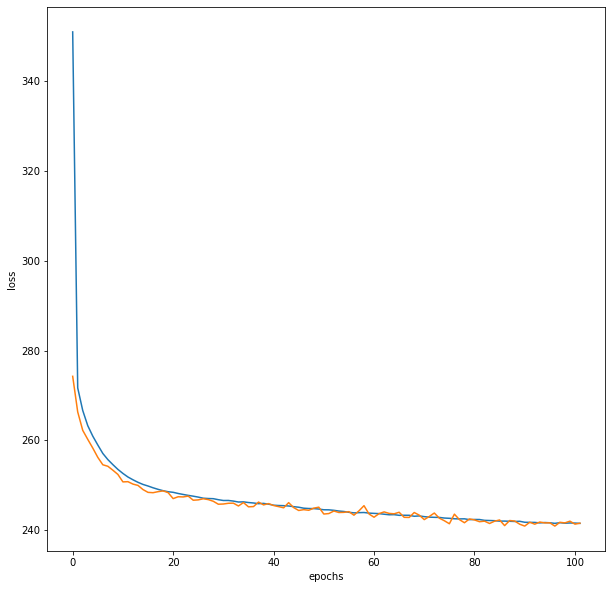

In [53]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
train_score = np.sqrt(metrics.mean_squared_error(train_pred,y_train))
test_score = np.sqrt(metrics.mean_squared_error(test_pred,y_test))

print("Train score (RMSE): {}".format(train_score))
print("Test score (RMSE): {}".format(test_score))


## plot the loss on the training data, and also the validation data
plt.figure(figsize=(10,10))

plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()


In [54]:
y_pred_train = stay_cat(train_pred)
y_pred_test = stay_cat(test_pred)

train_accuracy =  metrics.accuracy_score(y_pred_train, y_compare_train)
print("Train accuracy score: {}".format(train_accuracy))
test_accuracy =   metrics.accuracy_score(y_pred_test, y_compare_test)
print("Train accuracy score: {}".format(test_accuracy))

Train accuracy score: 0.3395965055408253
Train accuracy score: 0.34124080612882257


[Back to top](#Content:)


<a id='part9'></a>
### Model with L2 regularizer

In [55]:
model = Sequential()
#model.add(Dense(64, input_dim=X.shape[1], activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(64, input_dim=X.shape[1], activation='relu',activity_regularizer=regularizers.l2(0.01)))
#model.add(Dense(64, input_dim=x.shape[1], activation='relu',
#                kernel_regularizer=regularizers.l2(0.01),
#                activity_regularizer=regularizers.l1(0.01),activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='loss', min_delta=1e-1, patience=5, verbose=1, mode='auto')

r = model.fit(X_train,y_train,callbacks=[monitor],validation_split=0.25,verbose=0,epochs=50)



Train score (RMSE): 15.581470539508667
Test score (RMSE): 15.564769840649074


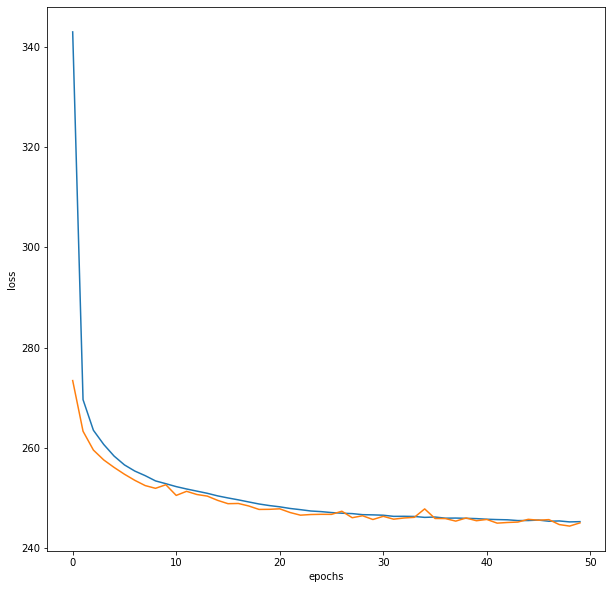

In [56]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
train_score = np.sqrt(metrics.mean_squared_error(train_pred,y_train))
test_score = np.sqrt(metrics.mean_squared_error(test_pred,y_test))

print("Train score (RMSE): {}".format(train_score))
print("Test score (RMSE): {}".format(test_score))


## plot the loss on the training data, and also the validation data
plt.figure(figsize=(10,10))

plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [57]:
y_pred_train = stay_cat(train_pred)
y_pred_test = stay_cat(test_pred)

train_accuracy =  metrics.accuracy_score(y_pred_train, y_compare_train)
print("Train accuracy score: {}".format(train_accuracy))
test_accuracy =   metrics.accuracy_score(y_pred_test, y_compare_test)
print("Train accuracy score: {}".format(test_accuracy))

Train accuracy score: 0.33427238425453804
Train accuracy score: 0.3356575609631735


[Back to top](#Content:)


<a id='part10'></a>
### Model with 2 hidden layers

In [14]:
from tensorflow.keras.layers import Dropout
model = Sequential()
#model.add(Dropout(0.1, input_shape=(X.shape[1],)))
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='loss',  min_delta=1e-1, patience=5, verbose=1, mode='auto')
r = model.fit(X_train,y_train,callbacks=[monitor],verbose=1,epochs=200)



2021-12-07 20:42:36.481760: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-07 20:42:36.482917: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 238828 samples
Epoch 1/200
238828/238828 [==============================] - 20s 86us/sample - loss: 283.5468
Epoch 2/200
238828/238828 [==============================] - 21s 90us/sample - loss: 254.9341
Epoch 3/200
238828/238828 [==============================] - 20s 85us/sample - loss: 250.7193
Epoch 4/200
238828/238828 [==============================] - 20s 85us/sample - loss: 248.4917
Epoch 5/200
238828/238828 [==============================] - 21s 87us/sample - loss: 246.7408
Epoch 6/200
238828/238828 [==============================] - 21s 90us/sample - loss: 245.5174
Epoch 7/200
238828/238828 [==============================] - 20s 84us/sample - loss: 244.6898
Epoch 8/200
238828/238828 [==============================] - 21s 89us/sample - loss: 243.8178
Epoch 9/200
238828/238828 [==============================] - 22s 91us/sample - loss: 243.0280
Epoch 10/200
238828/238828 [==============================] - 20s 84us/sample - loss: 242.2173
Epoch 11/200
238828/238828 [=======

238828/238828 [==============================] - 13s 56us/sample - loss: 231.4173
Epoch 86/200
238828/238828 [==============================] - 13s 56us/sample - loss: 231.3837
Epoch 87/200
238828/238828 [==============================] - 13s 54us/sample - loss: 231.3280
Epoch 88/200
238828/238828 [==============================] - 13s 54us/sample - loss: 231.2783
Epoch 89/200
238828/238828 [==============================] - 13s 55us/sample - loss: 231.1656
Epoch 90/200
238828/238828 [==============================] - 13s 56us/sample - loss: 231.1945s 
Epoch 91/200
238828/238828 [==============================] - 14s 59us/sample - loss: 231.1870
Epoch 92/200
238828/238828 [==============================] - 13s 56us/sample - loss: 230.9910
Epoch 93/200
238828/238828 [==============================] - 13s 55us/sample - loss: 230.9672
Epoch 94/200
238828/238828 [==============================] - 14s 58us/sample - loss: 230.9394s - loss - ETA: 0s - loss: 230.75 - ETA: 0s - loss: 230.83
Epo

Train score (RMSE): 15.108177393369578
Test score (RMSE): 15.595187574159125


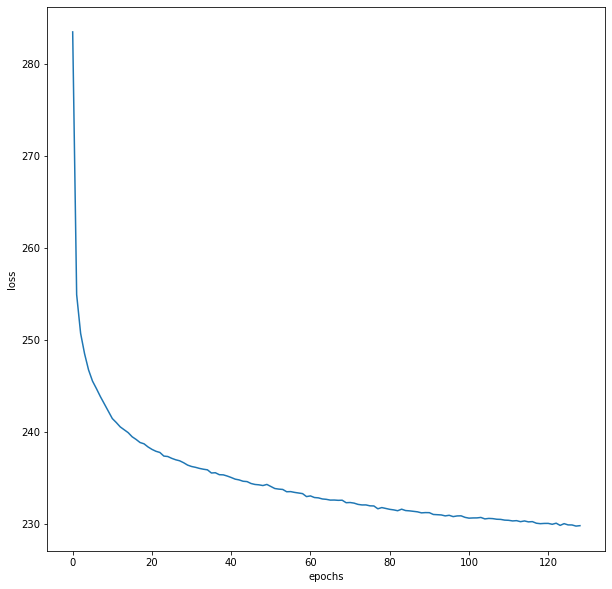

In [16]:
from sklearn import metrics
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
train_score = np.sqrt(metrics.mean_squared_error(train_pred,y_train))
test_score = np.sqrt(metrics.mean_squared_error(test_pred,y_test))

print("Train score (RMSE): {}".format(train_score))
print("Test score (RMSE): {}".format(test_score))


## plot the loss on the training data, and also the validation data
plt.figure(figsize=(10,10))

plt.plot(r.history['loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [20]:
np.min(test_pred)

-0.40007114

In [26]:
for i in range(len(train_pred)):
    train_pred[i] = stay_cat(train_pred[i])
for i in range(len(test_pred)):
    test_pred[i] = stay_cat(test_pred[i])   


In [27]:

y_compare_train = encoder.fit_transform(y_train)
y_compare_test = encoder.fit_transform(y_test)

train_accuracy =  metrics.accuracy_score(train_pred, y_compare_train)
print("Train accuracy score: {}".format(train_accuracy))
test_accuracy =   metrics.accuracy_score(test_pred, y_compare_test)
print("Train accuracy score: {}".format(test_accuracy))

Train accuracy score: 0.33249870199474096
Train accuracy score: 0.3288280366788092


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
      dtype=float32)

In [29]:
def score(y_test, y_pred):
    cat_number = len(np.unique(y_test))
    score = 1-np.sum(np.abs(y_test-y_pred))/((cat_number-1)*len(y_test))
    return score
    

In [1]:
score = 1-np.sum(np.abs(y_test-y_pred))/((cat_number-1)*len(y_test))

NameError: name 'np' is not defined

## Model with 2 hidden layers

In [32]:
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
r = model.fit(X_train,y_train,validation_split=0.25, verbose=1,epochs=100)



Train on 176508 samples, validate on 58836 samples
Epoch 1/100
176508/176508 [==============================] - 7s 37us/sample - loss: 305.4965 - val_loss: 262.0628
Epoch 2/100
176508/176508 [==============================] - 6s 35us/sample - loss: 260.5634 - val_loss: 254.3679
Epoch 3/100
176508/176508 [==============================] - 6s 34us/sample - loss: 254.5249 - val_loss: 249.6191
Epoch 4/100
176508/176508 [==============================] - 6s 33us/sample - loss: 250.7322 - val_loss: 248.2976
Epoch 5/100
176508/176508 [==============================] - 6s 33us/sample - loss: 248.6800 - val_loss: 247.3066
Epoch 6/100
176508/176508 [==============================] - 6s 34us/sample - loss: 247.1417 - val_loss: 243.8407
Epoch 7/100
176508/176508 [==============================] - 6s 33us/sample - loss: 245.9309 - val_loss: 245.7655
Epoch 8/100
176508/176508 [==============================] - 6s 33us/sample - loss: 244.9701 - val_loss: 242.7311
Epoch 9/100
176508/176508 [==========

Epoch 72/100
176508/176508 [==============================] - 6s 33us/sample - loss: 232.6951 - val_loss: 237.1573
Epoch 73/100
176508/176508 [==============================] - 6s 33us/sample - loss: 232.7053 - val_loss: 237.4953
Epoch 74/100
176508/176508 [==============================] - 6s 33us/sample - loss: 232.6305 - val_loss: 236.4527
Epoch 75/100
176508/176508 [==============================] - 6s 33us/sample - loss: 232.3946 - val_loss: 237.4373
Epoch 76/100
176508/176508 [==============================] - 6s 33us/sample - loss: 232.3204 - val_loss: 236.4974
Epoch 77/100
176508/176508 [==============================] - 6s 33us/sample - loss: 232.2915 - val_loss: 236.4261
Epoch 78/100
176508/176508 [==============================] - 6s 33us/sample - loss: 232.1144 - val_loss: 236.4006
Epoch 79/100
176508/176508 [==============================] - 6s 33us/sample - loss: 232.0779 - val_loss: 237.6814
Epoch 80/100
176508/176508 [==============================] - 6s 33us/sample - l

# Hot encoded Data

## Scaling Data

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = X_le.values
y = y_le
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
for i in range(X_train.shape[1]) :
    X_train[:,i]= scaler.fit_transform(X_train[:,i].reshape(-1, 1))[:,0]
    X_test[:,i] = scaler.transform(X_test[:,i].reshape(-1, 1))[:,0]

In [28]:
model = Sequential()
model.add(Dense(24, input_dim=X.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
r = model.fit(X_train,y_train,validation_split=0.25, verbose=1,epochs=100)



2021-12-06 16:50:17.604581: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-06 16:50:17.607763: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 179121 samples, validate on 59707 samples
Epoch 1/100
179121/179121 [==============================] - 6s 36us/sample - loss: 326.7050 - val_loss: 274.3054
Epoch 2/100
179121/179121 [==============================] - 6s 31us/sample - loss: 263.8534 - val_loss: 261.7533
Epoch 3/100
179121/179121 [==============================] - 6s 32us/sample - loss: 257.0203 - val_loss: 257.6050
Epoch 4/100
179121/179121 [==============================] - 6s 31us/sample - loss: 254.0718 - val_loss: 255.5828
Epoch 5/100
179121/179121 [==============================] - 6s 31us/sample - loss: 252.1165 - val_loss: 254.4680
Epoch 6/100
179121/179121 [==============================] - 6s 31us/sample - loss: 250.8108 - val_loss: 252.5061
Epoch 7/100
179121/179121 [==============================] - 6s 33us/sample - loss: 249.1842 - val_loss: 250.8185
Epoch 8/100
179121/179121 [==============================] - 7s 37us/sample - loss: 247.9880 - val_loss: 249.2924
Epoch 9/100
179121/179121 [==========

In [98]:
y_pred = model.predict(X_test)

In [21]:
def stay_cat(x):
    if x > 100 :
        return 10
    if x < 0 :
        return 0
    else :
        n = np.floor(x/10)
        return n

In [74]:
from sklearn import metrics
err = metrics.mean_squared_error(y_pred,y_test)
print(err)

248.93292218042518


In [67]:
def min_pred(x):
    t = np.floor((x-5)/10)
    t = 10*t+5
    t = np.minimum(t,105)
    t = np.maximum(t,5)
    return t

def max_pred(x):
    t = min_pred(x)+10
    return t

def true_pred(x):
    if max_pred(x)-x > x - min_pred(x):
        return min_pred(x)
    else :
        return max_pred(x)
    


In [99]:
y_true_pred = np.array([ true_pred(y_pred[i]) for i in range(len(y_pred))])
true_err = metrics.mean_squared_error(y_true_pred,y_test.reshape(-1,1))
print(true_err)

257.6698907172466


In [86]:
y_test

array([ 5, 25, 25, ..., 25, 15, 35])

In [85]:
encoder = LabelEncoder()

In [88]:
ytest = encoder.fit_transform(y_test)

In [102]:
ymin = encoder.fit_transform(min_pred(y_pred))

ytrue =encoder.fit_transform(y_true_pred)

/Users/baraa/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [105]:
accuracy =  metrics.accuracy_score(ytest, ymin)
print(accuracy)

0.31720889335510616


In [106]:
accuracy =  metrics.accuracy_score(ytest, ytrue)
print(accuracy)

0.3386509232508479


Text(91.68, 0.5, 'pred label')

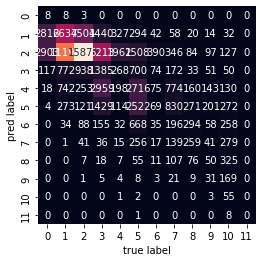

In [107]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, ytrue)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           )
plt.xlabel('true label')
plt.ylabel('pred label')

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))